In [73]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [74]:
train_df = pd.read_csv('titanic_x_y_train.csv',delimiter= ",")
test_df = pd.read_csv('titanic_X_test.csv',delimiter= ",")
combine = [train_df, test_df]

In [75]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,668,668,668,154,667
unique,668,2,524,119,3
top,"Karaic, Mr. Milan",male,347082,G6,S
freq,1,427,6,4,484


In [76]:
def bar_chart(feature):
    Survived = train_df[train_df['Survived'] == 1][feature].value_counts()
    Dead = train_df[train_df['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([Survived,Dead])
    df.index = ['Survived','Dead']
    df.plot(kind = 'bar',stacked = True,figsize=(10,5))

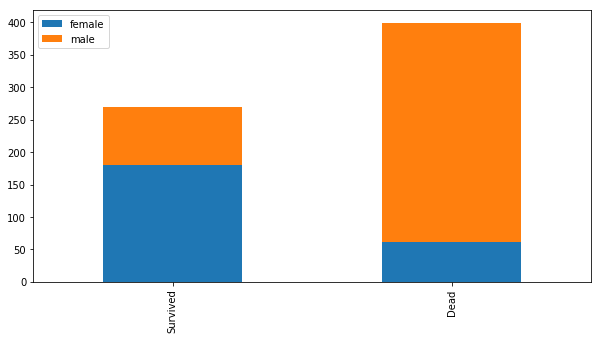

In [77]:
bar_chart('Sex')

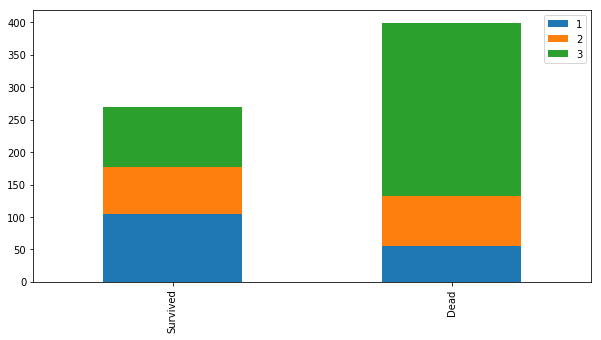

In [78]:
bar_chart('Pclass')

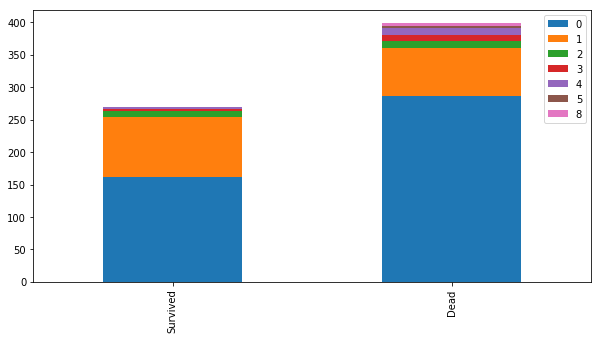

In [79]:
bar_chart('SibSp')

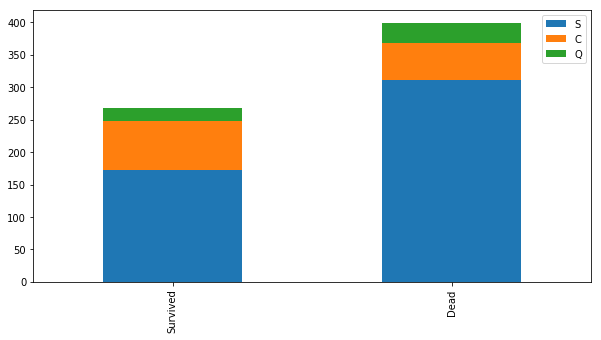

In [80]:
bar_chart('Embarked')

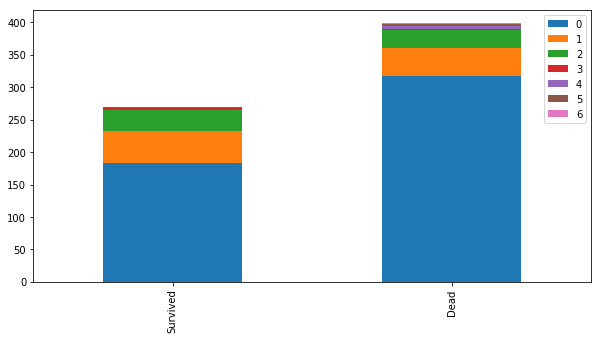

In [81]:
bar_chart('Parch')

In [82]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
2,2,0.542373
1,1,0.532609
0,0,0.366534
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [83]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]


In [84]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((668, 8), (223, 7))

In [85]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,1,29.0,1,0,26.000,S,1
1,3,0,NaN,0,0,8.050,S,0
2,2,0,39.0,0,0,26.000,S,0
3,3,1,29.0,0,4,21.075,S,0
4,3,0,25.0,0,0,7.050,S,0


In [86]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [87]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,1,29,1,0,26.000,S,1
1,3,0,26,0,0,8.050,S,0
2,2,0,39,0,0,26.000,S,0
3,3,1,29,0,4,21.075,S,0
4,3,0,25,0,0,7.050,S,0


In [88]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.581081
1,"(16.0, 32.0]",0.354054
2,"(32.0, 48.0]",0.447059
3,"(48.0, 64.0]",0.400000
4,"(64.0, 80.0]",0.111111


In [89]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,AgeBand
0,2,1,1,1,0,26.000,S,1,"(16.0, 32.0]"
1,3,0,1,0,0,8.050,S,0,"(16.0, 32.0]"
2,2,0,2,0,0,26.000,S,0,"(32.0, 48.0]"
3,3,1,1,0,4,21.075,S,0,"(16.0, 32.0]"
4,3,0,1,0,0,7.050,S,0,"(16.0, 32.0]"


In [90]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,1,1,1,0,26.000,S,1
1,3,0,1,0,0,8.050,S,0
2,2,0,2,0,0,26.000,S,0
3,3,1,1,0,4,21.075,S,0
4,3,0,1,0,0,7.050,S,0


In [91]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.700000
2,3,0.630952
1,2,0.560976
6,7,0.363636
0,1,0.318878
4,5,0.153846
5,6,0.117647
7,8,0.000000
8,11,0.000000


In [92]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.521739
1,1,0.318878


In [93]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Pclass,Sex,Age,Fare,Embarked,Survived,IsAlone
0,2,1,1,26.000,S,1,0
1,3,0,1,8.050,S,0,1
2,2,0,2,26.000,S,0,1
3,3,1,1,21.075,S,0,0
4,3,0,1,7.050,S,0,1


In [94]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,2,1,2
1,3,1,3
2,4,2,2
3,3,1,3
4,3,1,3
5,6,2,3
6,2,2,1
7,3,1,3
8,2,1,2
9,9,3,3


In [95]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [96]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.563910
1,Q,0.400000
2,S,0.358763


In [97]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Pclass,Sex,Age,Fare,Embarked,Survived,IsAlone,Age*Class
0,2,1,1,26.000,0,1,0,2
1,3,0,1,8.050,0,0,1,3
2,2,0,2,26.000,0,0,1,4
3,3,1,1,21.075,0,0,0,3
4,3,0,1,7.050,0,0,1,3


In [98]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class
0,2,0,0,36.7500,0,0,0
1,1,1,3,25.9292,0,1,3
2,3,0,1,7.7375,2,1,3
3,2,1,1,27.0000,0,0,2
4,1,0,2,26.2875,0,1,2


In [99]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.925]",0.218935
1,"(7.925, 14.75]",0.303030
2,"(14.75, 31.275]",0.485207
3,"(31.275, 512.329]",0.606061


In [100]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Pclass,Sex,Age,Fare,Embarked,Survived,IsAlone,Age*Class
0,2,1,1,2,0,1,0,2
1,3,0,1,1,0,0,1,3
2,2,0,2,2,0,0,1,4
3,3,1,1,2,0,0,0,3
4,3,0,1,0,0,0,1,3
5,3,0,2,0,1,0,1,6
6,1,1,2,3,0,1,0,2
7,3,0,1,0,0,0,1,3
8,2,0,1,1,0,1,1,2
9,3,0,3,1,0,0,1,9


In [101]:
test_df.head(10)

,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class
0,2,0,0,3,0,0,0
1,1,1,3,2,0,1,3
2,3,0,1,0,2,1,3
3,2,1,1,2,0,0,2
4,1,0,2,2,0,1,2
5,1,0,71,3,1,1,71
6,3,0,0,1,0,1,0
7,3,0,1,0,2,1,3
8,3,1,1,0,0,1,3
9,3,0,1,1,0,1,3


In [102]:
#train_df['Age_2'] = train_df['Age']**2
#train_df['Fare_2'] = train_df['Fare']**2

#test_df['Age_2'] = test_df['Age']**2
#test_df['Fare_2'] = test_df['Fare']**2


In [103]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.copy()
X_train.shape, Y_train.shape, X_test.shape

((668, 7), (668,), (223, 7))

In [104]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.fit_transform(X_train)

std_scale2 = preprocessing.StandardScaler().fit(X_test)
X_test_std = std_scale2.transform(X_test)

In [105]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer
my_pipeline = make_pipeline(Imputer(),RandomForestRegressor())

my_pipeline.fit(X_train,Y_train)
predictions = my_pipeline.predict(X_test)


In [126]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,Y_train)
Y_pred = LR.predict(X_test)
acc_lr = round(LR.score(X_train4,Y_train)*100,2)
acc_lr

36.06

In [106]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred1 = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

81.59

In [107]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred2 = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.98

In [108]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred3 = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

68.11

In [109]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred4 = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

C:\Users\Tutun\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


74.7

In [110]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred5 = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

77.99

In [111]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred6 = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

C:\Users\Tutun\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


77.69

In [112]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred7 = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.03

In [134]:
random_forest = RandomForestClassifier(n_estimators=100,n_jobs = -1)
random_forest.fit(X_train, Y_train)
Y_pred8 = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.03

In [127]:
np.savetxt("tita_new.csv",Y_pred,delimiter = ',')